### 5.1 Classfication

#### 5.1.1 Standard kNN Classifier

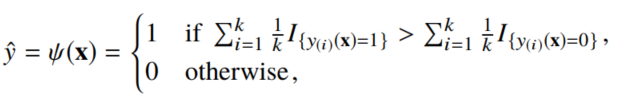

- k nearest neigbours
- c classes: j = 0, 1, ... c-1
- x is the test observation
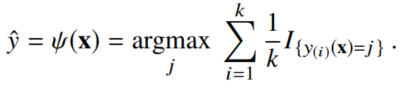

In [47]:
import numpy as np

arrays = np.load('data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
arrays = np.load('data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']

# for illustration purposes, we only consider the first two features
X_train = X_train[:, :2]
X_test = X_test[:, :2]

The accuracy for K=1 on the training data is 0.925
The accuracy for K=1 on the Test data is 0.7
The accuracy for K=3 on the training data is 0.8416666666666667
The accuracy for K=3 on the Test data is 0.7333333333333333
The accuracy for K=9 on the training data is 0.8583333333333333
The accuracy for K=9 on the Test data is 0.8
The accuracy for K=36 on the training data is 0.775
The accuracy for K=36 on the Test data is 0.8


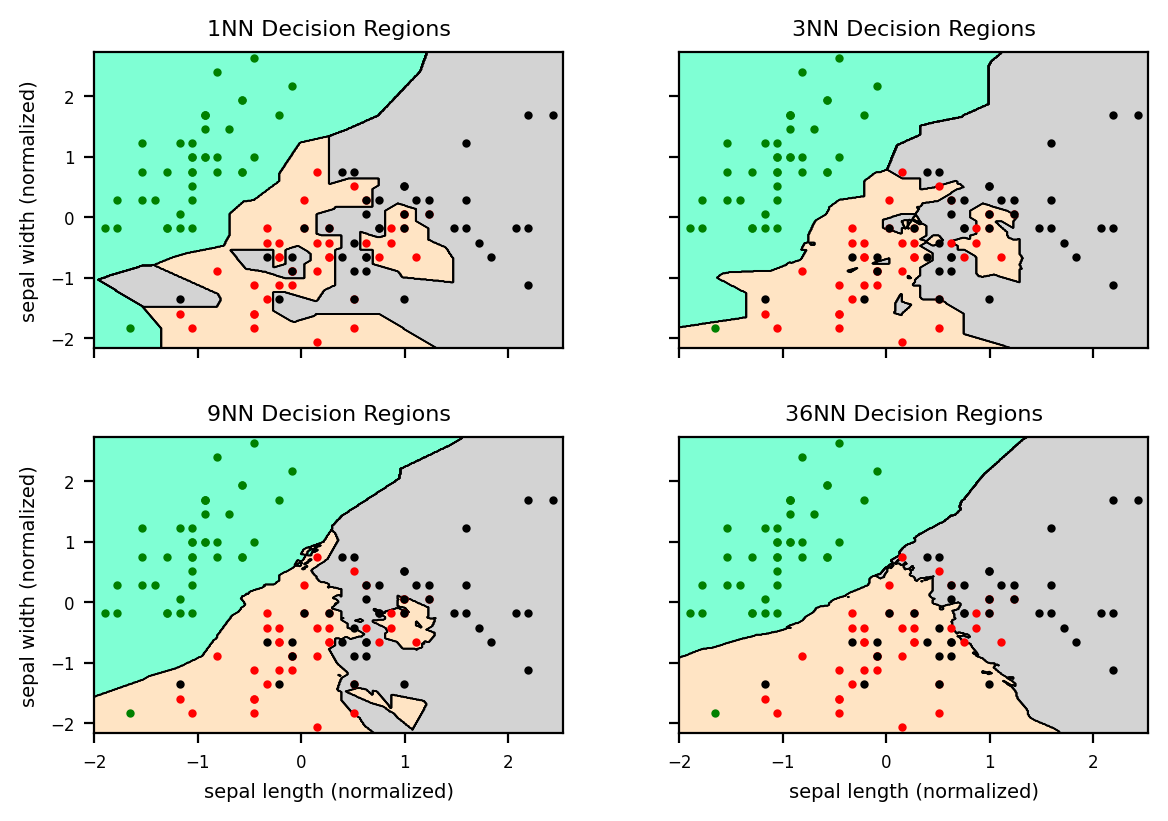

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier as KNN

color = ('aquamarine', 'bisque', 'lightgrey')
cmap = ListedColormap(color)

mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
fig, axs = plt.subplots(2, 2, figsize=(6, 4), dpi=200)
fig.tight_layout()
K_val = [1, 3, 9, 36]

for ax, K in zip(axs.ravel(), K_val):
  knn = KNN(n_neighbors=K)
  knn.fit(X_train, y_train)
  Z = knn.predict(coordinates)
  Z = Z.reshape(X.shape)
  ax.tick_params(axis='both', labelsize=6)
  ax.set_title(f'{K}NN Decision Regions', fontsize=8)
  ax.pcolormesh(X, Y, Z, cmap=cmap, shading='nearest')
  ax.contour(X, Y, Z, colors='black', linewidths=0.5)
  ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'g.', markersize=4)
  ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'r.', markersize=4)
  ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], 'k.', markersize=4)
  ax.set_xlabel('sepal length (normalized)', fontsize=7)
  ax.set_ylabel('sepal width (normalized)', fontsize=7)
  print(f'The accuracy for K={K} on the training data is {knn.score(X_train, y_train)}')
  print(f'The accuracy for K={K} on the Test data is {knn.score(X_test, y_test)}')
for ax in axs.ravel():
  ax.label_outer()

#### 5.2.2 Distance-Weighted knn Classifier

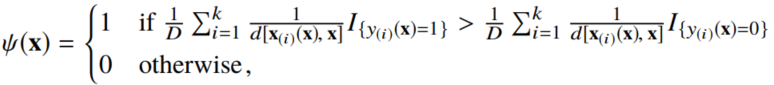
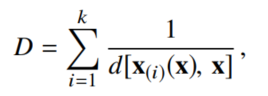

- Observations that are closer to x should impose a higher influence on decision making
- $d[x_{(i)}(x), x]$: the distance of $x_{(i)}(x)$ from $x$
- Standard kNN is a special form of DW-kNN, where the k nearest neigbor have equal contribution to voting
- scikit-learn, setting the weights parameter of KNeighborsClassifier to 'distance' (standard kNN: 'uniform')

#### 5.3.3 The Choice of Distance

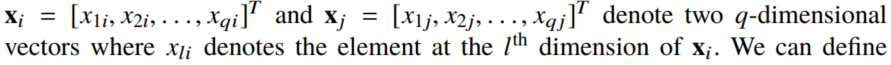

Euclidean, Manhattan, Minkowski

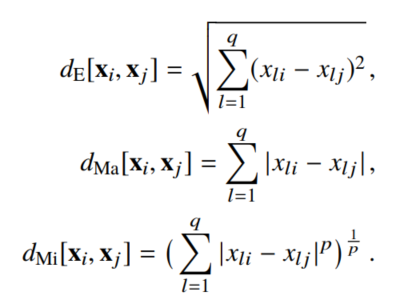

- In KNeighborsClassifier, the choice of distance is determined by the metric parameter
- Although the default metric in KNeighborsClassifier is Minkowski, the default value of parameter p is 2
- The default distance is the Euclidean distance

### 5.2 Regression

#### 5.2.1 Standard kNN Regressor

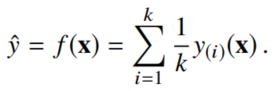

- the regressor estimates the target of a given x as the average of the targets of the k nearest neighbors of x

#### 5.2.2 A Regression Application Using kNN

In [49]:
from sklearn import datasets
california = datasets.fetch_california_housing()
print(california.data.shape)
print(california.feature_names)
print(california.target_names)

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [50]:
print(california.DESCR[:975])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. cen


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15480, 8)
(5160, 8)
(15480,)
(5160,)


In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Pearson's correlation coefficients

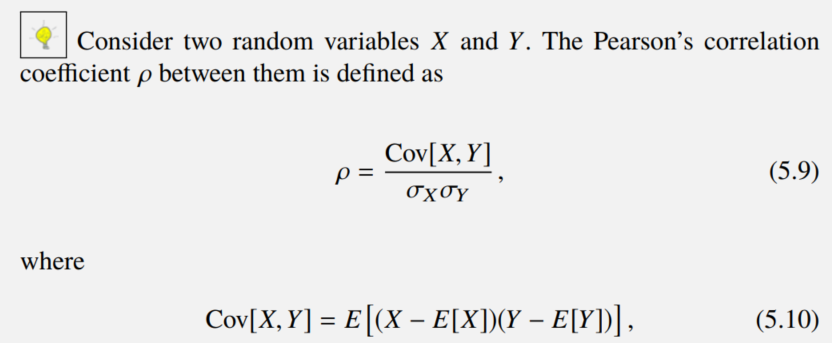

- In practice, we cannot generally compute (5.9) because it depends on the unknown actual expectations and standard deviations. Therefore we need to estimate that from a sample.
- It is a measure of the degree of linear relationship between two random variables
- It is scale and location invariant

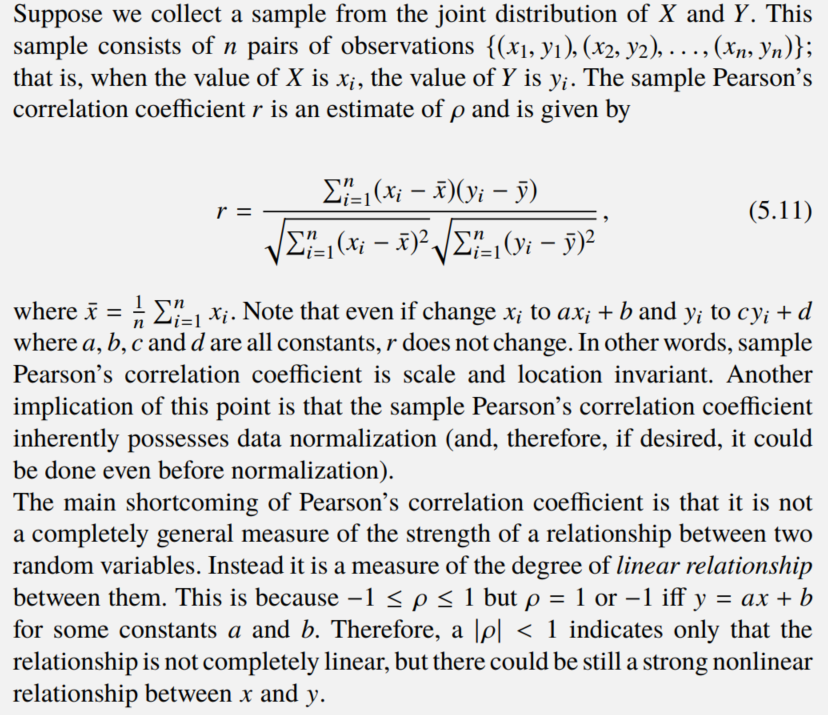

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

california_arr = np.concatenate((X_train_scaled, y_train.reshape(-1, 1)), axis=1)
california_pd = pd.DataFrame(california_arr, columns=[*california.feature_names, 'MEDV'])
california_pd.head().round(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,1.604,-0.843,0.974,-0.086,0.068,0.027,-0.865,0.883,2.903
1,-0.921,0.345,-0.197,-0.238,-0.472,-0.068,1.647,-0.999,0.687
2,-0.809,1.849,-0.376,-0.037,-0.516,-0.082,1.675,-0.741,1.097
3,0.597,-0.289,-0.437,-0.119,-0.680,-0.121,1.008,-1.423,4.600
4,0.219,0.107,0.187,0.122,-0.436,-0.057,0.956,-1.283,2.134


<Axes: >

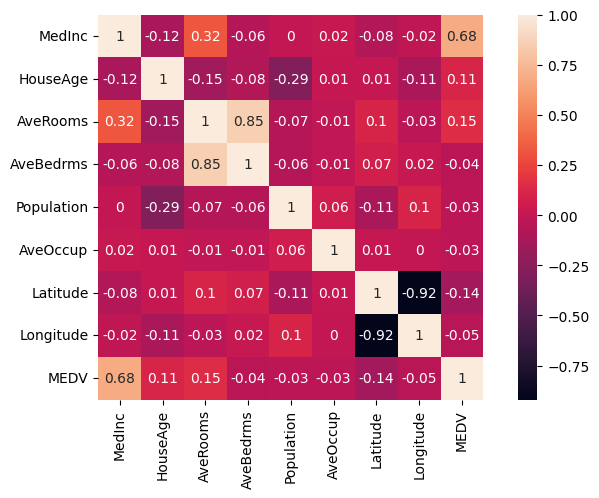

In [54]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(california_pd.corr().round(2), annot=True, square=True, ax=ax)

In [55]:
# We simply select variables with a correlation magnitude greater than 0.1
X_train_fs_scaled = X_train_scaled[:, [0, 1, 2, 6]]
X_test_fs_scaled = X_test_scaled[:, [0, 1, 2, 6]]
print(X_train_fs_scaled.shape, X_test_fs_scaled.shape)

(15480, 4) (5160, 4)


In [56]:
np.savez('data/california_train_fs_scaled', X=X_train_fs_scaled, y=y_train)
np.savez('data/california_test_fs_scaled', X=X_test_fs_scaled, y=y_test)

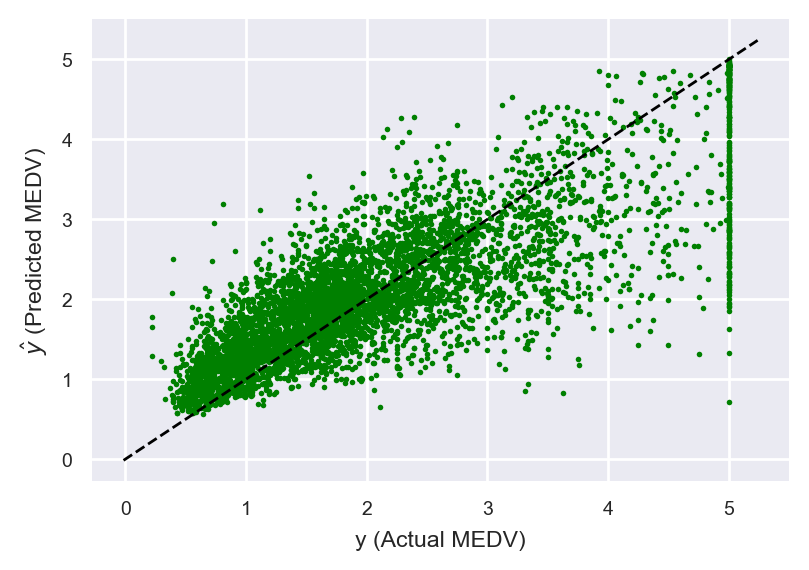

In [71]:
from sklearn.neighbors import KNeighborsRegressor as KNN
plt.style.use('seaborn-v0_8')

knn = KNN(n_neighbors=50)
knn.fit(X_train_fs_scaled, y_train)
y_test_predictions = knn.predict(X_test_fs_scaled)

plt.figure(figsize=(4.5, 3), dpi=200)
plt.plot(y_test, y_test_predictions, 'g.', markersize=4)
lim_left, lim_right = plt.xlim()
plt.plot([lim_left, lim_right], [lim_left, lim_right], '--k', linewidth=1)
plt.xlabel('y (Actual MEDV)', fontsize='small')
plt.ylabel('$\hat{y}$ (Predicted MEDV)', fontsize='small')
plt.tick_params(axis='both', labelsize=7)

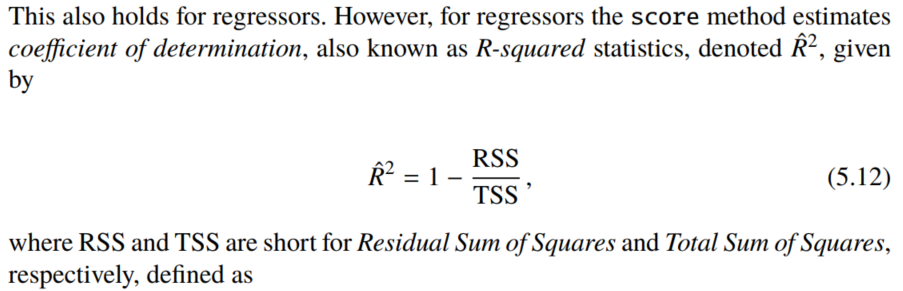
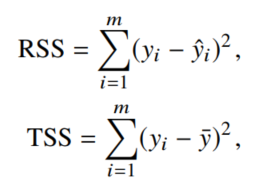

- $\bar{y} = \frac{1}{m} \sum_{i=1}^{m}{y_i}$: target mean within the test set
- $\hat{R}^2$: measures how well the trained regressor is performing when compared with the trivial estimator of the target, which is $\bar{y}$
- For perfect predictions: $RSS = 0$ and $\hat{R}^2 = 1$
- When trained regressor is performing similarly to the trivial average estimator: $RSS = TSS$ and $\hat{R}^2 = 0$

In [72]:
print(f'The test R^2 is: {knn.score(X_test_fs_scaled, y_test)}')

The test R^2 is: 0.6269553980657807


#### 5.2.3 Distance Weighted kNN Regressor

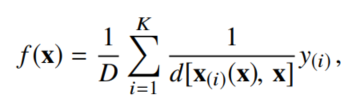

- It computes a weighted average of targets for the k nearest neighbors from the test observation x
- When $d[x_{(i)}(x), x] = 1$ for all k nearest neighbors, it reduces to the standard kNN regressor